In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [85]:
#Load file
ste = pd.read_csv(r"C:\Users\HP 1030\Desktop\FSDS\Week 7 - Python\EDA\Case Study\Sterling Ecommerce Case Study\sterling.csv")

In [3]:
# Print the top rows
ste.head()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2/11/2008,8/7/2022 0:00,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,6/23/2005,8/8/2022 0:00,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8
2,Men's Fashion,Belleville,St. Clair,112386,6/23/2005,8/8/2022 0:00,"Shimp, Mariela",F,881492,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.9
3,Computing,Young America,Carver,112501,9/15/2013,8/18/2022 0:00,"Doiron, Latrina",F,886067,100551079.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,6822.9
4,Entertainment,Young America,Carver,112501,9/15/2013,8/20/2022 0:00,"Doiron, Latrina",F,886878,100551618.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,2849.9


In [4]:
# Print the last rows
ste.tail()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
283078,Women's Fashion,Burkettsville,Mercer,81251,10/15/2013,12/30/2021 0:00,"Kester, Apolonia",F,700522,100428972.0,cod,Burkettsville,572291,Midwest,OH,azkester,45310,2,69.8
283079,Women's Fashion,Burkettsville,Mercer,81251,10/15/2013,12/30/2021 0:00,"Kester, Apolonia",F,700518,100428972.0,cod,Burkettsville,572291,Midwest,OH,azkester,45310,2,69.9
283080,Women's Fashion,Burkettsville,Mercer,81251,10/15/2013,12/30/2021 0:00,"Kester, Apolonia",F,700520,100428972.0,cod,Burkettsville,572291,Midwest,OH,azkester,45310,2,79.8
283081,Women's Fashion,Burkettsville,Mercer,81251,10/15/2013,12/30/2021 0:00,"Kester, Apolonia",F,700517,100428972.0,cod,Burkettsville,572291,Midwest,OH,azkester,45310,2,79.9
283082,Women's Fashion,Burkettsville,Mercer,81251,10/15/2013,12/30/2021 0:00,"Kester, Apolonia",F,700519,100428972.0,cod,Burkettsville,572291,Midwest,OH,azkester,45310,2,79.9


In [5]:
# Check the dimensionality of the data - The number of rows and columns

ste.shape

(283083, 19)

In [6]:
# Examining the column/features of the data

ste.columns

Index(['Category', 'City', 'County', 'Cust Id', 'Customer Since',
       'Date of Order', 'Full Name', 'Gender', 'Item Id', 'Order Id',
       'Payment Method', 'Place Name', 'Ref Num', 'Region', 'State',
       'User Name', 'Zip', 'Qty Ordered', 'Total'],
      dtype='object')

In [7]:
# Investigating the dataset for anomalies and data types

ste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Category        283083 non-null  object 
 1   City            283083 non-null  object 
 2   County          283083 non-null  object 
 3   Cust Id         283083 non-null  int64  
 4   Customer Since  283083 non-null  object 
 5   Date of Order   283083 non-null  object 
 6   Full Name       283083 non-null  object 
 7   Gender          283083 non-null  object 
 8   Item Id         283083 non-null  int64  
 9   Order Id        283078 non-null  float64
 10  Payment Method  283083 non-null  object 
 11  Place Name      283083 non-null  object 
 12  Ref Num         283083 non-null  int64  
 13  Region          283083 non-null  object 
 14  State           283083 non-null  object 
 15  User Name       283083 non-null  object 
 16  Zip             283083 non-null  int64  
 17  Qty Ordere

In [8]:
#checking for duplicate features

ste.duplicated().sum()

0

In [9]:
ste.isnull().sum()

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          5
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

### Observation:
There are 5 missing order numbers

In [86]:
# Showing rows with missing values

ste[ste.isnull().any(axis=1)]

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
38758,Soghaat,Leiters Ford,Fulton,111867,11/4/2010,8/4/2022 0:00,"Wright, Man",M,879766,NaN,cod,Leiters Ford,939999,Midwest,IN,mewright,46945,2,36.0
38759,Soghaat,Leiters Ford,Fulton,111867,11/4/2010,8/4/2022 0:00,"Wright, Man",M,879765,NaN,cod,Leiters Ford,939999,Midwest,IN,mewright,46945,3,45.0
133217,Mobiles & Tablets,Rock Point,Charles,92075,4/8/2014,4/1/2022 0:00,"Torkelson, Berneice",F,767619,NaN,cod,Rock Point,715389,South,MD,bttorkelson,20682,2,2919.9
145889,Mobiles & Tablets,Uniopolis,Auglaize,111166,2/23/2017,7/21/2022 0:00,"Cannon, Shamika",F,872703,NaN,cod,Uniopolis,406105,Midwest,OH,svcannon,45888,2,578.9
224999,Computing,Barrington,Camden,40853,8/24/2009,8/12/2022 0:00,"Robichaux, Marion",M,883358,NaN,cod,Barrington,986961,Northeast,NJ,mjrobichaux,8007,2,39.9


We have more than 283,000 orders. So dropping 5 orders with missing order IDs out of the over 283,000 orders should not affect our analysis.

In [87]:
# Drop the orders with missing order IDs 

ste.dropna(inplace=True)

In [88]:
ste.shape

(283078, 19)

We previously have 283083 number of orders before we dropped the missing orders with order ID. So the new number of orders we will use for our analysis is 283078

# Analysis

In [13]:
# Numerical statistical analysis

ste.describe()

,Cust Id,Item Id,Order Id,Ref Num,Zip,Qty Ordered,Total
count,283078.000000,283078.000000,2.830780e+05,283078.000000,283078.000000,283078.000000,283078.000000
mean,70106.401674,741745.081239,1.004570e+08,561103.707236,49147.444333,3.008238,816.232342
std,30215.281047,95664.051170,6.090992e+04,256099.906291,27235.638638,4.565207,1986.176881
min,4.000000,574769.000000,1.003547e+08,111127.000000,210.000000,1.000000,0.000000
25%,56640.000000,659897.250000,1.004047e+08,341071.000000,26264.000000,2.000000,49.900000
50%,74320.000000,742468.500000,1.004518e+08,565623.000000,48808.000000,2.000000,149.800000
75%,92371.000000,826075.750000,1.005134e+08,782182.250000,72004.750000,3.000000,800.000000
max,115326.000000,905208.000000,1.005624e+08,999981.000000,99402.000000,501.000000,101262.590000


In [14]:
# Categorical statistical analysis

ste.describe(include=(["object", "bool"]))

,Category,City,County,Customer Since,Date of Order,Full Name,Gender,Payment Method,Place Name,Region,State,User Name
count,283078,283078,283078,283078,283078,283078,283078,283078,283078,283078,283078,283078
unique,15,15668,2518,11629,365,63610,2,13,15668,4,49,63407
top,Mobiles & Tablets,Dekalb,Jefferson,11/30/2005,12/20/2021 0:00,"Gonzalez, Joel",M,cod,Dekalb,South,TX,jugonzalez
freq,60952,2525,3510,2536,13522,2524,144292,101745,2525,103481,17510,2524


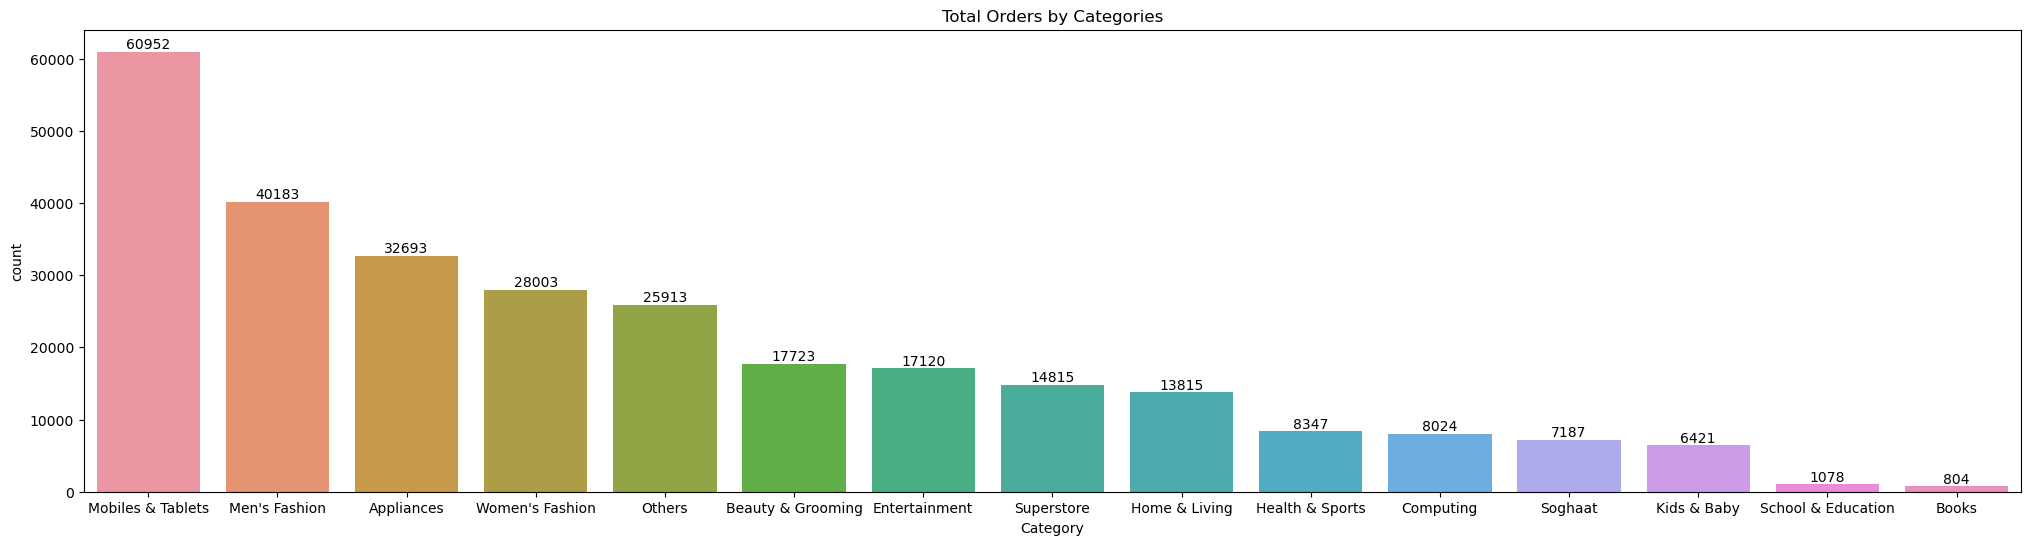

In [15]:
# Category analysis

plt.figure(figsize=(25,6))
plt.title("Total Orders by Categories")
ax = sb.countplot(data=ste, x='Category', order=ste['Category'].value_counts().index)

abs_values = ste['Category'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);

#### Observation:
From the chart above, we see that the category with most number of orders is the Mobiles & Tablets categories followed by Men's Fashion...

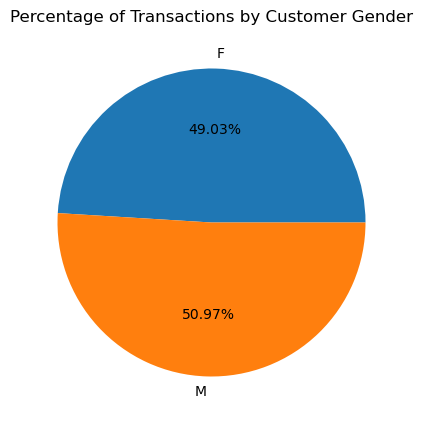

In [30]:
# Total transactions by customer gender

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(ste["Gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of Transactions by Customer Gender")
plt.show();

#### Observation:

More than half(50.97%) of the orders come from Male customers

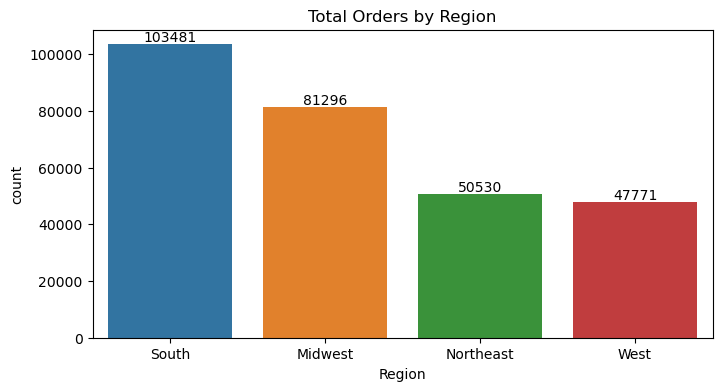

In [21]:
# Orders by region analysis

plt.figure(figsize=(8,4))
plt.title("Total Orders by Region")
ax = sb.countplot(data=ste, x='Region', order=ste['Region'].value_counts().index)

abs_values = ste['Region'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);

#### Observation:
Majority of the orders comes from customers that lives in the South followed by customers in the midwest

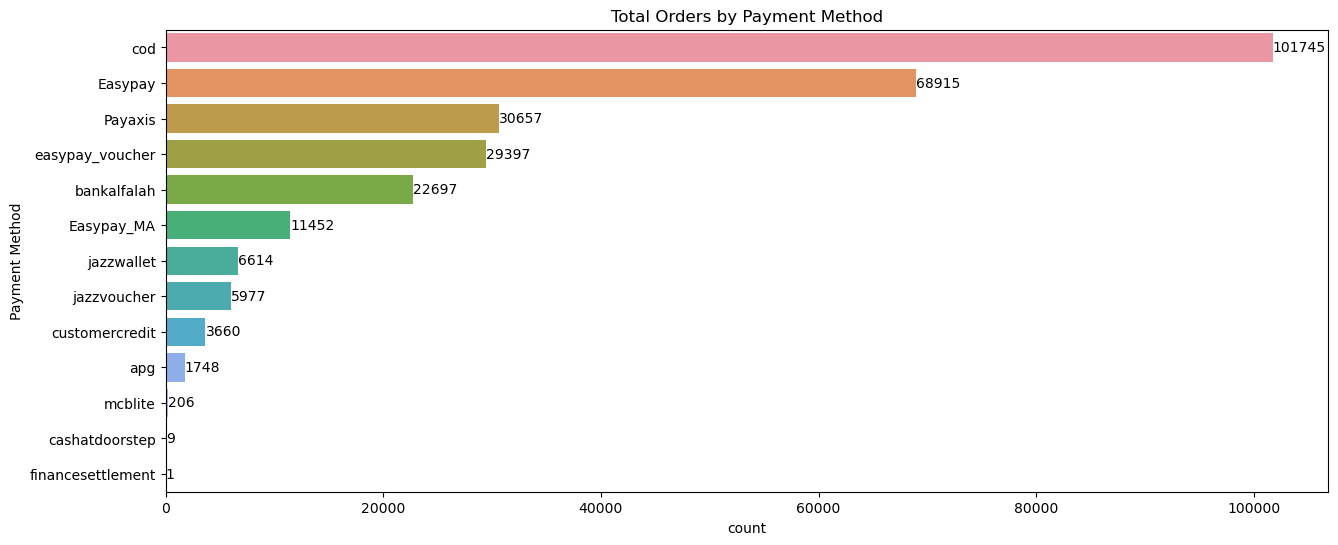

In [29]:
# Orders by Payment Method

plt.figure(figsize=(15,6))
plt.title("Total Orders by Payment Method")
ax = sb.countplot(data=ste, y='Payment Method', order=ste['Payment Method'].value_counts().index)

abs_values = ste['Payment Method'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);

#### Observation:

Most payment methods used by customers are cod, Easypay, Payaxis and easypay_voucher

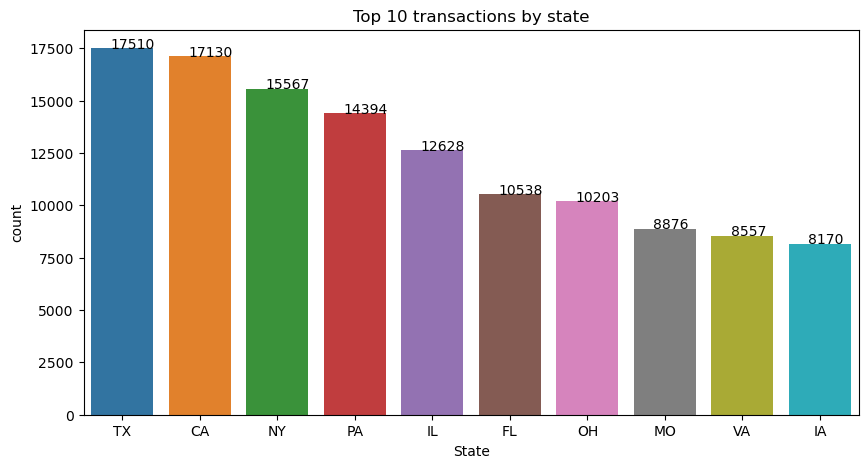

In [57]:
# Top 10 transactions by state

fig,ax = plt.subplots(figsize=(10,5))
topten = ste["State"].value_counts().head(10)
ax.set_title("Top 10 transactions by state")
sb.countplot(x="State", data=ste, order=ste["State"].value_counts().head(10).index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


#### Observation:
From the chart above, we can see the majority of orders come from customers in TX, CA, NY, PA, IL

In [65]:
# Extracting the Date of Order Year and Month to know the total monthly orders

ste["Date of Order"] = pd.to_datetime(ste["Date of Order"])

# Extract the Year, Month, Quarter
ste['year'] = ste["Date of Order"].dt.year
ste['month'] = ste["Date of Order"].dt.month
ste['month_name'] = ste["Date of Order"].dt.month_name()

ste.head(2)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,...,Region,State,User Name,Zip,Qty Ordered,Total,year,month,month_name,quarter
0,Health & Sports,Bode,Humboldt,112285,2/11/2008,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,...,Midwest,IA,mcrenaud,50519,3,32.0,2022,8,August,3
1,Men's Fashion,Belleville,St. Clair,112386,6/23/2005,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,...,Midwest,IL,mgshimp,62223,2,74.8,2022,8,August,3


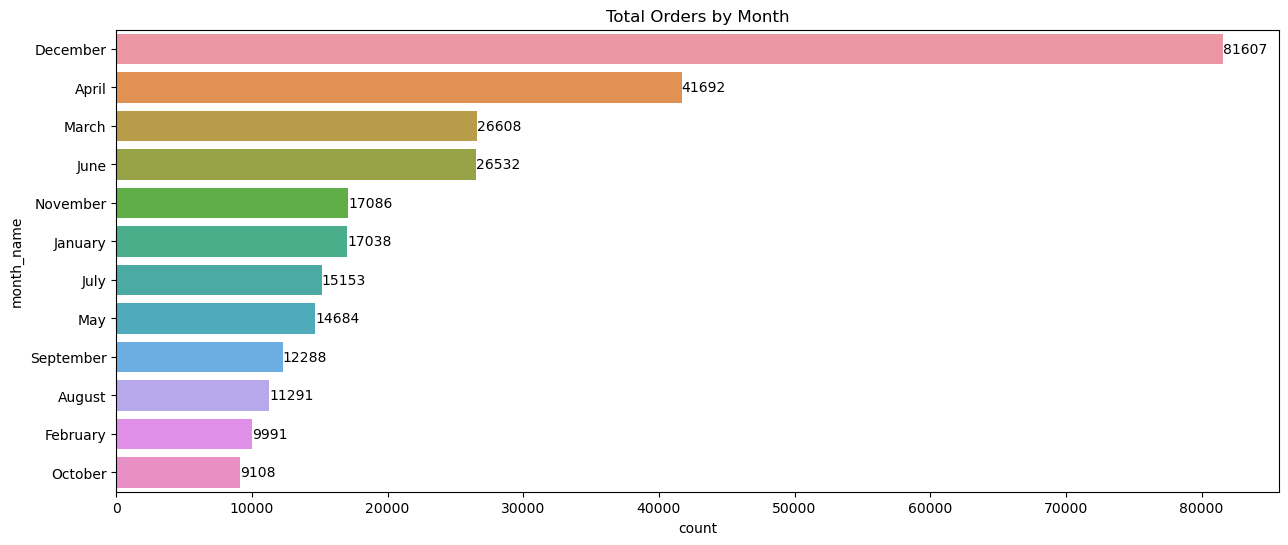

In [68]:
# Orders by month

plt.figure(figsize=(15,6))
plt.title("Total Orders by Month")
ax = sb.countplot(data=ste, y='month_name', order=ste['month_name'].value_counts().index)

abs_values = ste['month_name'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);

#### Observation:
Customers order more in the months; December, April,  March, June, November and January. The high orders in Decemeber might be that December is a festive period

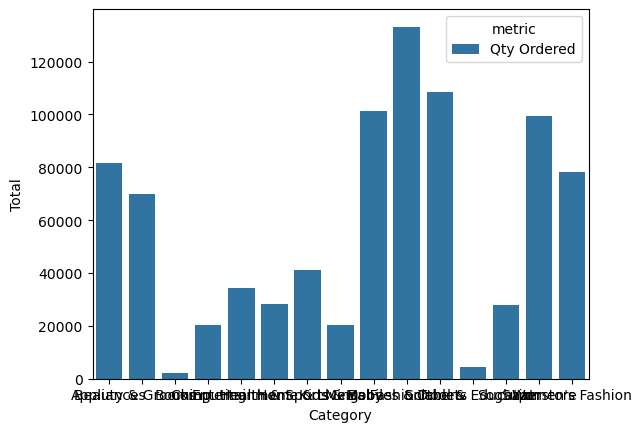

In [92]:
# Product category against Order Quantity

procat = ste.groupby("Category")[["Qty Ordered", ""]].sum().reset_index()
procat = pd.melt(procat, id_vars="Category", var_name="metric", value_name="Total")
sb.barplot(x="Category", data=procat, y="Total", hue="metric");